In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Úkoly

1. Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.


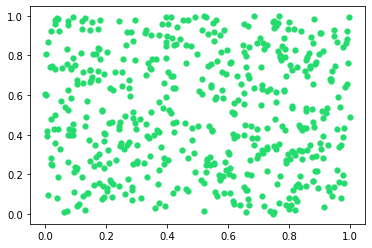

In [8]:
rand = np.random.rand(1000, 500)
ax = plt.axes()
plt.scatter(rand[0], rand[1], color="#24dc6d", linewidths=0.2)


2. Vykreslete 3D graf s funkcí $$z = \frac{\sin(\sqrt{x^2 + y^2})}{\sqrt{x^2 + y^2}}$$ Použijte `imagesc` a `contour`.


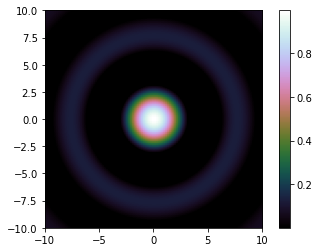

In [9]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

Z = np.sin(np.sqrt(X**2 + Y**2)) / np.sqrt(X**2 + Y**2)

fig, ax = plt.subplots()

im = plt.imshow(Z, cmap="cubehelix", vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[-10, 10, -10, 10])

cb = fig.colorbar(im, ax=ax)


3. Vykreslete polar graf s funkcí $r = 2\sin(3θ)$. Použijte funkci plot a nastavte barvu, osy a titulek.


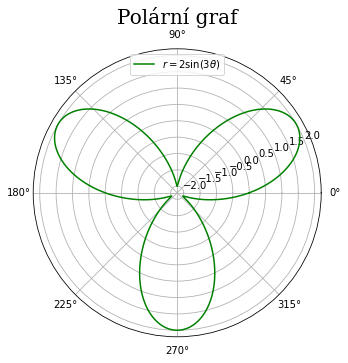

In [10]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], polar=True)

t = np.linspace(0, 2 * np.pi, 1000)
r = 2 * np.sin(3* t)

ax.plot(t, r, color="green", label=r"$r = 2\sin(3\theta)$")
plt.title("Polární graf", family="serif", fontsize=20)
plt.legend(loc=9)



4. Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.


Text(0, 0.5, 'Počet')

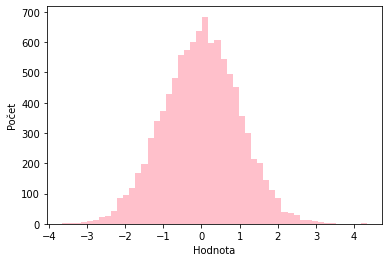

In [11]:
rand = np.random.randn(10000)
plt.hist(rand, bins=50, color="pink")
plt.xlabel("Hodnota")
plt.ylabel("Počet")


5. Vytvořte 3D surf graf s funkcí $$z = \cos(\sqrt{x^2 + y^2})$$


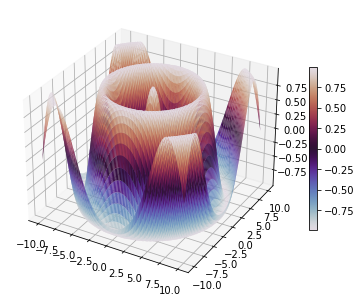

In [20]:
fig = plt.figure(figsize=(14,6))

# `ax` je trojrozměrná osa (díky keyword argumentu projection)
ax = fig.add_subplot(1, 2, 1, projection='3d')

Z = np.cos(np.sqrt(X**2 + Y**2))

# Povrchový graf s doprovodnou barevnou informací
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="twilight", linewidth=0, antialiased=True)
cb = fig.colorbar(p, shrink=0.5)

# Domácí úkol
- Použijte funkce z minulého úkolu `integer_spiral_numpy` a `integer_spiral` a vykreslete spirálu a její sinus pomocí `imshow` a `contour`.
- měřte časy výpočtu pro různé hodnoty mezi 11 a 1001 a porovnejte je.
- vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů do jednoho grafu.
- nastavte popisky, legendu a osy
- co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu? 

In [22]:
# Definice funkcí integer_spiral a integer_spiral_numpy
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj

def integer_spiral_numpy(n: int):
    if not n % 2 or n < 1:
        raise ValueError("argument `n` must be a positive odd integer")
    cent = n // 2
    M = np.zeros((n, n))
    i = 1
    M[cent, cent] = i
    for ofst in range(1, cent + 1):
        M[cent - ofst, cent - ofst : cent + ofst] = np.arange(i + ofst * 2, i, -1)
        i += ofst * 2 + 1
        M[cent + 1 - ofst : cent + 1 + ofst, cent - ofst] = np.arange(i, i + ofst * 2)
        i += ofst * 2
        M[cent + ofst, cent + 1 - ofst : cent + 1 + ofst] = np.arange(i, i + ofst * 2)
        i += ofst * 2 - 1
        M[cent - ofst : cent + ofst, cent + ofst] = np.arange(i + ofst * 2, i, -1)
        i += ofst * 2
    return M

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

spiral = integer_spiral_numpy(15)

axes[0].imshow(spiral)
axes[1].contour(spiral)


In [62]:
from timeit import timeit

nums = np.arange(11, 1002, 2)

integer_spiral_time = lambda x: timeit(lambda: integer_spiral(x), number=1)
ist = np.vectorize(integer_spiral_time)
loop_based_times = ist(nums)

integer_spiral_numpy_time = lambda x: timeit(lambda: integer_spiral_numpy(x), number=1)
isnt = np.vectorize(integer_spiral_numpy_time)
numpy_based_times = isnt(nums)

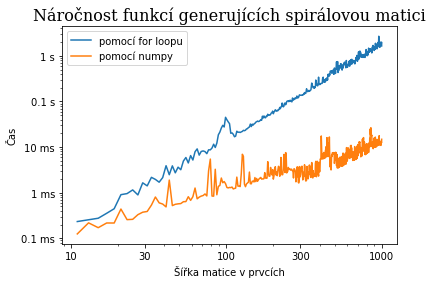

In [105]:
fig, axes = plt.subplots(1, 1)

axes.plot(nums, loop_based_times, label="pomocí for loopu")
axes.plot(nums, numpy_based_times, label="pomocí numpy")
axes.legend()

axes.set_title("Náročnost funkcí generujících spirálovou matici", family="serif", fontsize=16)
axes.set_xlabel("Šířka matice v prvcích")
axes.set_ylabel("Čas")

axes.set_xscale("log")
axes.set_yscale("log")

axes.set_xticks([10, 30, 100, 300, 1000])
axes.set_xticklabels([10, 30, 100, 300, 1000])

axes.set_yticks([1e-4, 1e-3, 1e-2, 1e-1, 1])
axes.set_yticklabels(["0.1 ms", "1 ms", "10 ms", "0.1 s", "1 s"])

None

Sklon log-log grafu reprezentuje rychlost, s jakou daná funkce roste. Konkrétně např. všechny polynomy jednoho řádu budou mít nakonec stejný sklon. Je tedy zřejmé, že implementace pomocí for loopu je řádově náročnější, než implementace pomocí numpy arrayů.

# Bonusový úkol
Použijte funkci `polyfit` z knihovny `numpy` pro logaritmicky transponované časy a počty prvků a zjistěte koeficient u lineární funkce při aproximaci polynomem 1. stupně.

Vykreslete lineární aproximace získané funkci `polyfit` do log-log grafu společne s naměřenými daty.

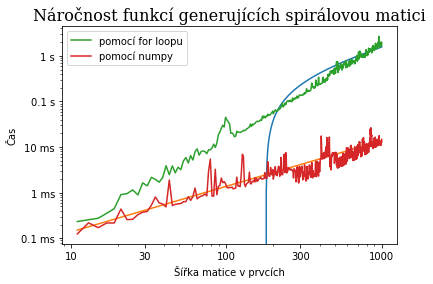

In [118]:
A, B = np.polyfit(nums, loop_based_times, 1)
loop_based_times_approx = A * nums + B

A, B = np.polyfit(nums, numpy_based_times, 1)
numpy_based_times_approx = A * nums

fig, axes = plt.subplots(1, 1)
axes.plot(nums, loop_based_times_approx, nums, numpy_based_times_approx)

axes.plot(nums, loop_based_times, label="pomocí for loopu")
axes.plot(nums, numpy_based_times, label="pomocí numpy")
axes.legend()

axes.set_title("Náročnost funkcí generujících spirálovou matici", family="serif", fontsize=16)
axes.set_xlabel("Šířka matice v prvcích")
axes.set_ylabel("Čas")

axes.set_xscale("log")
axes.set_yscale("log")

axes.set_xticks([10, 30, 100, 300, 1000])
axes.set_xticklabels([10, 30, 100, 300, 1000])

axes.set_yticks([1e-4, 1e-3, 1e-2, 1e-1, 1])
axes.set_yticklabels(["0.1 ms", "1 ms", "10 ms", "0.1 s", "1 s"])

None

